In [33]:
import sys
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import pickle
from IPython.display import  Audio
import os
from config import SAMPLE_RATE
import scipy.signal


In [ ]:
%load_ext autoreload

%autoreload 2

In [20]:
dataset = pickle.load(open('data/data_wavs_compiled.pkl', 'rb'))


In [21]:
Audio(dataset[1], rate=SAMPLE_RATE)

In [26]:
wav = dataset[1]
f, t, Sxx = scipy.signal.spectrogram(wav, fs=SAMPLE_RATE)

/Users/nemo/Documents/projects/Signal_processing/VoiceVAE/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


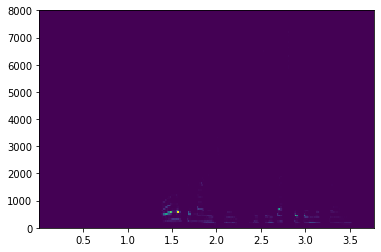

In [27]:
plt.pcolormesh(t, f, Sxx)

In [31]:
D = librosa.stft(wav)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

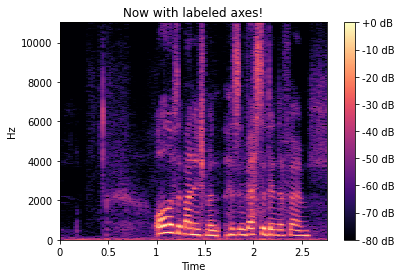

In [36]:
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Now with labeled axes!')
fig.colorbar(img, ax=ax, format="%+2.f dB")

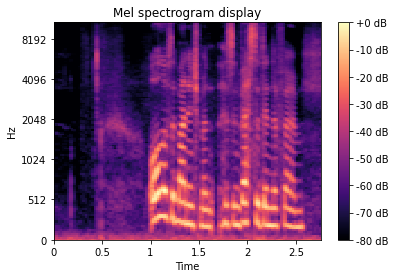

In [39]:
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=wav, sr=SAMPLE_RATE)
M = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram display')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [44]:

from audio import audio

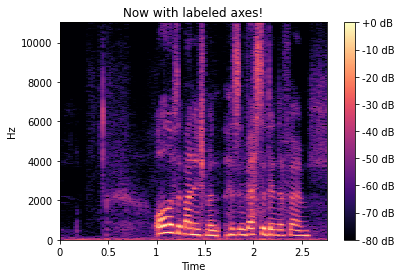

In [45]:
audio.plot_spectrogram(wav, SAMPLE_RATE)

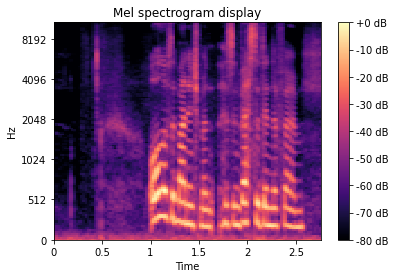

In [46]:
audio.plot_spectrogram_mel(wav, SAMPLE_RATE)